In [1]:
import cx_Oracle
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer
import imblearn
import numpy as np
import pickle 
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
connection = cx_Oracle.connect(user="admin", password="Projetmachine1", dsn="ProjetDB_low")
cursor = connection.cursor()

In [3]:
df = pd.read_sql("""select  * from CREDIT_FINAL""", con=connection)

In [4]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
# Total missing values
    mis_val = df.isnull().sum()

# Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

# Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

# Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [5]:
#missing_values_table(df)
# Call simplifier to replace missing values that are less that 47%
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
missing_values_table(df)

Your selected dataframe has 119 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [6]:
yraw = df["TARGET"]
xraw = df.select_dtypes(include=np.number).loc[:,df.columns!="TARGET"]
oversample = imblearn.over_sampling.SMOTE()
x, y = oversample.fit_resample(xraw, yraw)

Random forest :  0.9564713685606898


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

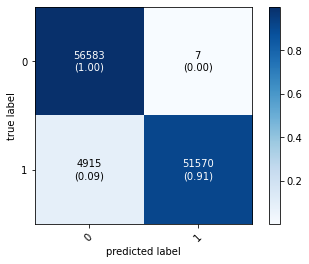

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Random forest : ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),colorbar=True,
                        show_absolute=True, show_normed=True, class_names=[0,1])

In [8]:
rf.feature_importances_
# Créer 1df qui contient les features et leur importance
feature = [column for column in x.columns]
importance = np.round(rf.feature_importances_ * 100, 2)
feature_importance = pd.DataFrame({'feature' : feature, 'importance' : importance})
df_fi=feature_importance.sort_values('importance', ascending=False)
df_fi

,feature,importance
2,CODE_GENDER,7.19
12,NAME_EDUCATION_TYPE,4.20
3,FLAG_OWN_CAR,4.04
36,REG_CITY_NOT_WORK_CITY,3.75
39,EXT_SOURCE_2,3.49
110,REJECTED_LOAN,3.47
24,FLAG_PHONE,3.33
116,CLIENT_TYPE,2.93
47,FLAG_DOCUMENT_3,2.77
11,NAME_INCOME_TYPE,2.58


In [9]:
cols_sign=df_fi[df_fi["importance"]>0.5]["feature"].append(pd.Series(["TARGET"]))
# print(cols_sign
list(cols_sign)

['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'REJECTED_LOAN',
 'FLAG_PHONE',
 'CLIENT_TYPE',
 'FLAG_DOCUMENT_3',
 'NAME_INCOME_TYPE',
 'FLAG_EMP_PHONE',
 'DAYS_EMPLOYED_ANOM',
 'OCCUPATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_OWN_REALTY',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_WORK_PHONE',
 'CASH_LOANS',
 'ORGANIZATION_TYPE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'CANCELED_LOAN',
 'NAME_FAMILY_STATUS',
 'REG_CITY_NOT_LIVE_CITY',
 'APPROVED_LOAN',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'WEEKDAY_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_TYPE_SUITE',
 'CONSUMER_LOANS',
 'DAYS_BIRTH',
 'BUREAU_ACTIVE_LOANS',
 'NB_DEMANDS',
 'DAYS_ID_PUBLISH',
 'POS_SK_DPD',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_POPULATION_RELATIVE',
 'BUREAU_SUM_AMT_OF_PAST_LOANS',
 'SK_ID_CURR',
 'DAYS_REGISTRATION',
 'POS_NAME_CONTRACT_STA

In [13]:
knnPickle = open('knnpickle_file', 'wb') 
pickle.dump(rf, knnPickle)       